In [2]:
import pandas as pd 

xls = pd.ExcelFile('./../data/multi_asset_etf_data.xlsx')
sheet_names = xls.sheet_names
print(sheet_names)



/Users/patsy/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


['descriptions', 'prices', 'total returns', 'excess returns']


In [3]:
import pandas as pd 

xls = pd.ExcelFile('./../data/multi_asset_etf_data.xlsx')
sheet_names = xls.sheet_names
print(sheet_names)



['descriptions', 'prices', 'total returns', 'excess returns']


In [4]:
data = pd.read_excel('./../data/multi_asset_etf_data.xlsx', sheet_name='excess returns')
data = data.set_index('Date')

In [5]:
data.tail() 

,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SPY,TIP
Date,,,,,,,,,,,
2024-05-31,0.009647,-0.007581,0.014935,0.046020,0.011758,0.013420,0.044692,0.034457,0.008852,0.045998,0.013189
2024-06-30,-0.013674,-0.005917,0.021982,-0.022466,0.000595,0.007972,0.014565,-0.021305,-0.000965,0.031082,0.003417
2024-07-31,0.033913,-0.032580,0.003854,0.021317,0.018924,0.024373,0.071649,0.063989,0.006681,0.007510,0.012676
2024-08-31,0.025539,-0.025794,0.004799,0.027624,0.010495,0.008478,0.049029,-0.003754,0.002669,0.018386,0.003011
2024-09-30,0.023280,0.004912,0.070120,0.006742,0.013145,0.012029,0.018761,0.051810,0.010278,0.012344,0.011034


In [6]:
import numpy as np 
annualized_er = (data * 12).mean() 
annualized_vol = data.std() * np.sqrt(12) 
annualized_er, annualized_vol

(BWX   -0.011888
 DBC   -0.009086
 EEM    0.026960
 EFA    0.055037
 HYG    0.037356
 IEF    0.013939
 IYR    0.077912
 PSP    0.092851
 QAI    0.014959
 SPY    0.126983
 TIP    0.016844
 dtype: float64,
 BWX    0.081671
 DBC    0.168455
 EEM    0.179940
 EFA    0.152203
 HYG    0.077289
 IEF    0.063197
 IYR    0.169585
 PSP    0.215238
 QAI    0.049007
 SPY    0.143066
 TIP    0.051258
 dtype: float64)

In [7]:
def portfolio_metrics(returns): 
    metrics_df = pd.DataFrame(index = returns.columns)
    metrics_df['er'] = returns.mean() * 12
    metrics_df['vol'] = returns.std() * np.sqrt(12)
    metrics_df['sr'] = (returns.mean() / returns.std()) * np.sqrt(12)
    return metrics_df

In [8]:
portfolio_metrics(data).sort_values(by = 'sr')

,er,vol,sr
BWX,-0.011888,0.081671,-0.145563
DBC,-0.009086,0.168455,-0.053935
EEM,0.026960,0.179940,0.149829
IEF,0.013939,0.063197,0.220561
QAI,0.014959,0.049007,0.305241
TIP,0.016844,0.051258,0.328618
EFA,0.055037,0.152203,0.361605
PSP,0.092851,0.215238,0.431386
IYR,0.077912,0.169585,0.459426
HYG,0.037356,0.077289,0.483335


BWX has the worst SR, while SPY has the best SR

In [9]:
er = data* 12
corr_matrix = er.corr()
corr_matrix

,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SPY,TIP
BWX,1.000000,0.233222,0.638705,0.600620,0.620946,0.568903,0.562599,0.552010,0.662425,0.466152,0.680001
DBC,0.233222,1.000000,0.516908,0.521447,0.471924,-0.300523,0.290040,0.467111,0.494467,0.448389,0.114379
EEM,0.638705,0.516908,1.000000,0.820770,0.694174,0.020477,0.589003,0.761796,0.791130,0.699939,0.379465
EFA,0.600620,0.521447,0.820770,1.000000,0.790742,0.018537,0.705926,0.910596,0.863957,0.864822,0.386677
HYG,0.620946,0.471924,0.694174,0.790742,1.000000,0.180087,0.739567,0.814182,0.811161,0.794782,0.541758
IEF,0.568903,-0.300523,0.020477,0.018537,0.180087,1.000000,0.297047,0.017486,0.176287,-0.005053,0.745025
IYR,0.562599,0.290040,0.589003,0.705926,0.739567,0.297047,1.000000,0.753810,0.718397,0.760646,0.590805
PSP,0.552010,0.467111,0.761796,0.910596,0.814182,0.017486,0.753810,1.000000,0.870673,0.890719,0.415854
QAI,0.662425,0.494467,0.791130,0.863957,0.811161,0.176287,0.718397,0.870673,1.000000,0.862479,0.527724
SPY,0.466152,0.448389,0.699939,0.864822,0.794782,-0.005053,0.760646,0.890719,0.862479,1.000000,0.393647


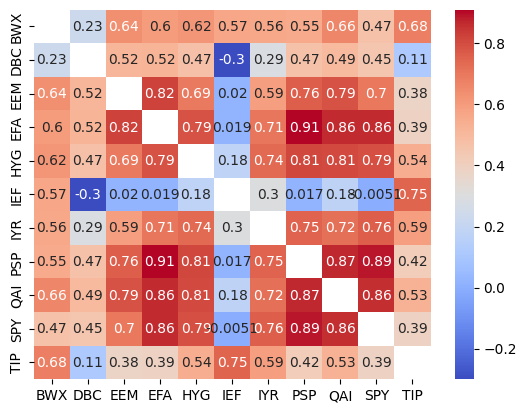

In [10]:
import seaborn as sns 
import matplotlib.pyplot as plt 
mask = np.eye(corr_matrix.shape[0], dtype=bool)
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm')
plt.show()


In [11]:
corr_pairs = corr_matrix.unstack()
corr_pairs = corr_pairs[corr_pairs != 1]
sorted_corr = corr_pairs.sort_values()
lowest_corr = sorted_corr.head(1)
highest_corr = sorted_corr.tail(1)

print("Lowest correlation pair:", lowest_corr)
print("Highest correlation pair:", highest_corr)

Lowest correlation pair: IEF  DBC   -0.300523
dtype: float64
Highest correlation pair: PSP  EFA    0.910596
dtype: float64


<Axes: xlabel='Date'>

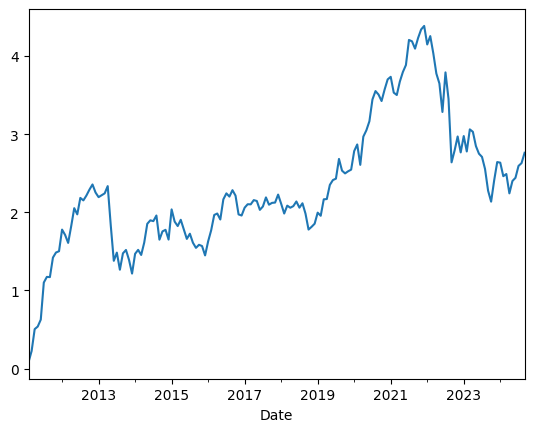

In [12]:
er['TIP'].cumsum().plot()

In [13]:
merged_df = portfolio_metrics(data).sort_values(by = 'sr')
merged_df

,er,vol,sr
BWX,-0.011888,0.081671,-0.145563
DBC,-0.009086,0.168455,-0.053935
EEM,0.026960,0.179940,0.149829
IEF,0.013939,0.063197,0.220561
QAI,0.014959,0.049007,0.305241
TIP,0.016844,0.051258,0.328618
EFA,0.055037,0.152203,0.361605
PSP,0.092851,0.215238,0.431386
IYR,0.077912,0.169585,0.459426
HYG,0.037356,0.077289,0.483335


TIP has performed relatively well with an increase in the expected returns with a SR of 0.329. 

As for the comparison with the other bonds: 

Foreign Bonds:
BWX – SPDR Bloomberg International Treasury Bond ETF: Invests in foreign government bonds.


Domestic Bonds (U.S.):
IEF – iShares 7-10 Year Treasury Bond ETF: Invests in U.S. Treasury bonds.
TIP – iShares TIPS Bond ETF: Invests in U.S. Treasury Inflation-Protected Securities (TIPS).
HYG – iShares iBoxx $ High Yield Corporate Bond ETF: Invests in U.S. high-yield corporate bonds.

TIP has outperformed IEF and BWX with a higher expected return but underperformed relative to HYG. However, TIP has a lower vol compared to the others. 

In [67]:
# tangency portfolio 

# Using the solutions from 2023, I used the function for tangency weights to construct the tangency portfolio

def tangency_weights(returns,dropna=True,scale_cov=1):
    if dropna:
        returns = returns.dropna()

    covmat_full = returns.cov()
    covmat_diag = np.diag(np.diag(covmat_full))
    covmat = scale_cov * covmat_full + (1-scale_cov) * covmat_diag

    weights = np.linalg.solve(covmat,returns.mean())
    weights = weights / weights.sum()

    return pd.DataFrame(weights, index=returns.columns)


weights = tangency_weights(er)
weights.rename(columns = {0: 'Weight'}, inplace=True)
weights.sort_values(by = 'Weight' )


TypeError: Series.cov() missing 1 required positional argument: 'other'

In [15]:
weights_df = pd.merge(merged_df, weights, on = merged_df.index).set_index('key_0') 
weights_df['Weight_Rank'] = weights_df['Weight'].rank(ascending=False)
weights_df['SR_Rank'] = weights_df['sr'].rank(ascending=False)
weights_df

,er,vol,sr,Weight,Weight_Rank,SR_Rank
key_0,,,,,,
BWX,-0.011888,0.081671,-0.145563,2.730253,2.0,11.0
DBC,-0.009086,0.168455,-0.053935,-0.111241,7.0,10.0
EEM,0.026960,0.179940,0.149829,-0.615698,8.0,9.0
IEF,0.013939,0.063197,0.220561,0.530692,4.0,8.0
QAI,0.014959,0.049007,0.305241,-0.832578,9.0,7.0
TIP,0.016844,0.051258,0.328618,-4.682480,10.0,6.0
EFA,0.055037,0.152203,0.361605,0.877108,3.0,5.0
PSP,0.092851,0.215238,0.431386,0.277002,6.0,4.0
IYR,0.077912,0.169585,0.459426,7.220592,1.0,3.0


no the rankings do not ali

In [16]:
# using the weights construct the er 
weights = pd.DataFrame(index = data.columns)
weights['tangency'] = tangency_weights(er)
port = pd.DataFrame(data @ weights['tangency'],columns=['tangency'])    
portfolio_metrics(port).sort_values(by = 'sr')

,er,vol,sr
tangency,-0.527276,0.328513,-1.605037


<Axes: >

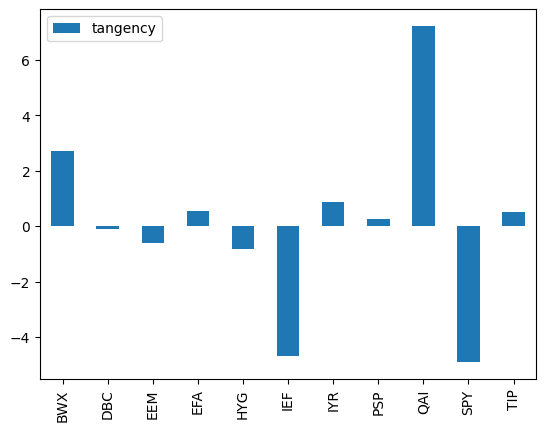

In [17]:
weights.plot.bar()

In [18]:
# Scenario 1 : Dropping TIP 

asset = 'TIP' 

new_data = data.drop(columns = [asset]) 

# using the weights construct the er 
weights = pd.DataFrame(index = new_data.columns)
weights['tangency'] = tangency_weights(new_data)
port = pd.DataFrame(new_data @ weights['tangency'],columns=['tangency'])    
portfolio_metrics(port).sort_values(by = 'sr')

,er,vol,sr
tangency,-0.580806,0.362125,-1.603881


<Axes: >

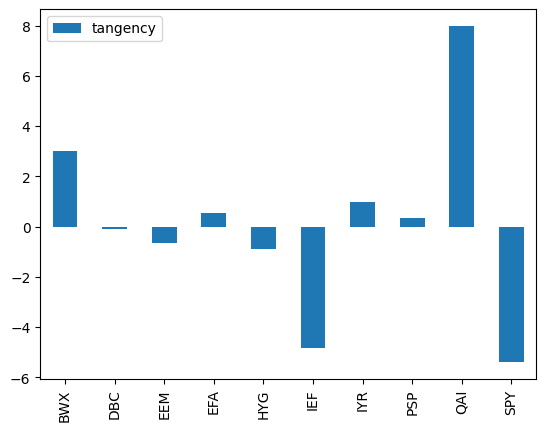

In [19]:
weights.plot.bar()


The weights do not change substantially from dropping TIP. 

In [20]:
# Scenario 2: Increasing expected return to + 0.0012 


new_data = data.copy() 
new_data['TIP'] = new_data['TIP'] + 0.0012
weights = pd.DataFrame(index = new_data.columns)
weights['tangency'] = tangency_weights(new_data)
port = pd.DataFrame(new_data @ weights['tangency'],columns=['tangency'])    
portfolio_metrics(port).sort_values(by = 'sr')

,er,vol,sr
tangency,-6.174021,3.655768,-1.688844


<Axes: >

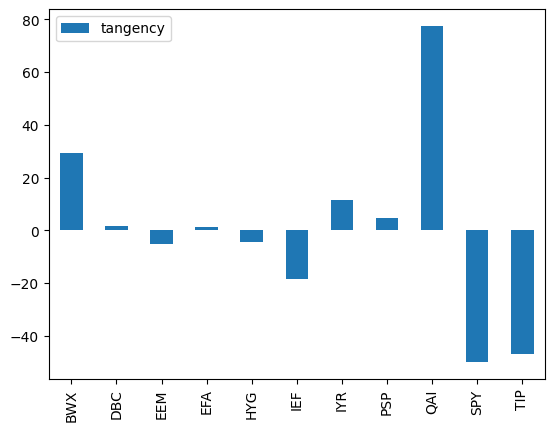

In [21]:
weights.plot.bar()

No it does not. Hardly any changes in the overall returns, volatility and sharpe ratios for both portfolio scenarios. 

# Allocations

In [83]:
target = 0.01
n_assets = len(data.columns)

ewp_weight = 1/n_assets 
rp_weight = 1/data.var() 
regularized_weights = tangency_weights(data, scale_cov = 0.5) 

weights_df = pd.DataFrame() 
stocks = data.columns 
weights_df.index = stocks
weights_df['ewp'] = ewp_weight
weights_df['rp'] = rp_weight
weights_df['reg'] = regularized_weights
# rp_weight *= target / (data.mean() @ rp_weight)
# ewp_weights.value = [ewp_weight * n_assets]
# ewp_weights.index = stocks 
data.mean() @ weights_df

ewp     0.003347
rp     34.406684
reg     0.012669
dtype: float64

In [45]:
er = data.mean()
current_portfolio_return = np.dot(ewp_weight, er).sum()
scaling_factor = target / current_portfolio_return
adjusted_weights = weights * scaling_factor
adjusted_weights = adjusted_weights / np.sum(adjusted_weights)

# Display the adjusted weights
print(adjusted_weights)


0.0033474736069806976